Lecture 8: Sampling and Standard Error

In [1]:
import random, pylab, numpy

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1

In [2]:
def makeHist(data, title, xlabel, ylabel, bins = 20):
    pylab.hist(data, bins = bins)
    pylab.title(title)
    pylab.xlabel(xlabel)
    pylab.ylabel(ylabel)

In [3]:
def getHighs():
    inFile = open('temperatures.csv')
    population = []
    for l in inFile:
        try:
            tempC = float(l.split(',')[1])
            population.append(tempC)
        except:
            continue
    return population

In [4]:
def getMeansAndSDs(population, sample, verbose = False):
    popMean = sum(population)/len(population)
    sampleMean = sum(sample)/len(sample)
    if verbose:
        makeHist(population,
                 'Daily High 1961-2015, Population\n' +\
                 '(mean = '  + str(round(popMean, 2)) + ')',
                 'Degrees C', 'Number Days')
        pylab.figure()
        makeHist(sample, 'Daily High 1961-2015, Sample\n' +\
                 '(mean = ' + str(round(sampleMean, 2)) + ')',
                 'Degrees C', 'Number Days')   
        print('Population mean =', popMean)
        print('Standard deviation of population =',
              numpy.std(population))
        print('Sample mean =', sampleMean)
        print('Standard deviation of sample =',
              numpy.std(sample))
    return popMean, sampleMean,\
           numpy.std(population), numpy.std(sample)

Population mean = 16.298769461986048
Standard deviation of population = 9.437558544803602
Sample mean = 17.0685
Standard deviation of sample = 10.390314372048614
Mean of sample Means = 16.294
Standard deviation of sample means = 0.943


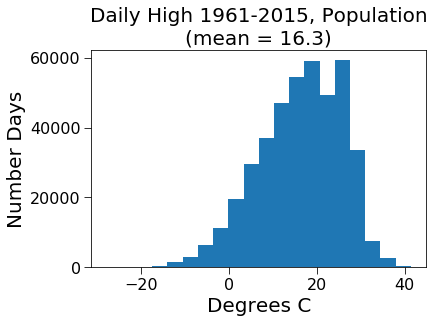

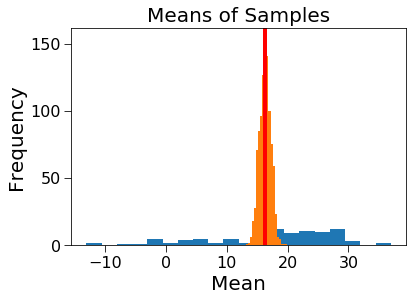

In [6]:
random.seed(0)         
population = getHighs()
sample = random.sample(population, 100)
getMeansAndSDs(population, sample, True)

random.seed(0) 
population = getHighs()
sampleSize = 100
numSamples = 1000
sampleMeans = []
for i in range(numSamples):
    sample = random.sample(population, sampleSize)
    popMean, sampleMean, popSD, sampleSD =\
       getMeansAndSDs(population, sample, verbose = False)
    sampleMeans.append(sampleMean)
print('Mean of sample Means =',
      round(sum(sampleMeans)/len(sampleMeans), 3))
print('Standard deviation of sample means =',
      round(numpy.std(sampleMeans), 3))
makeHist(sampleMeans, 'Means of Samples', 'Mean', 'Frequency')
pylab.axvline(x = popMean, color = 'r')

In [7]:
def showErrorBars(population, sizes, numTrials):
    xVals = []
    sizeMeans, sizeSDs = [], []
    for sampleSize in sizes:
        xVals.append(sampleSize)
        trialMeans = []
        for t in range(numTrials):
            sample = random.sample(population, sampleSize)
            popMean, sampleMean, popSD, sampleSD =\
               getMeansAndSDs(population, sample)
            trialMeans.append(sampleMean)
        sizeMeans.append(sum(trialMeans)/len(trialMeans))
        sizeSDs.append(numpy.std(trialMeans))
    print(sizeSDs)
    pylab.errorbar(xVals, sizeMeans,
                   yerr = 1.96*pylab.array(sizeSDs), fmt = 'o',
                   label = '95% Confidence Interval')
    pylab.title('Mean Temperature ('
                + str(numTrials) + ' trials)')
    pylab.xlabel('Sample Size')
    pylab.ylabel('Mean')
    pylab.axhline(y = popMean, color ='r', label = 'Population Mean')
    pylab.xlim(0, sizes[-1] + 10)
    pylab.legend()

[1.318787374029643, 1.0053313241911843, 0.7064000708875964, 0.5175415224646237, 0.46485751939942627, 0.44740799259288966, 0.402357328713478]


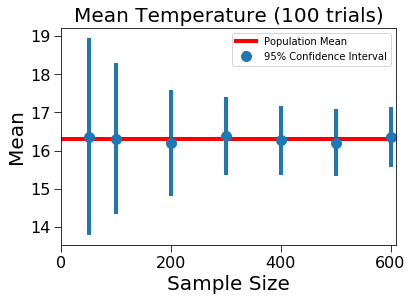

In [8]:
random.seed(0)
population = getHighs()   
showErrorBars(population,
              (50, 100, 200, 300, 400, 500, 600), 100)

In [9]:
def sem(popSD, sampleSize):
    return popSD/sampleSize**0.5

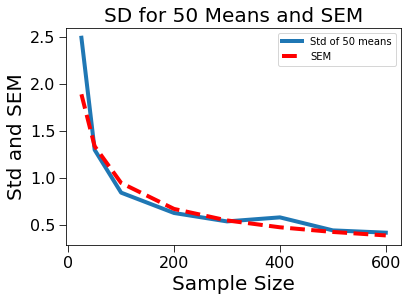

In [10]:
sampleSizes = (25, 50, 100, 200, 300, 400, 500, 600)
numTrials = 50
population = getHighs()
popSD = numpy.std(population)
sems = []
sampleSDs = []
for size in sampleSizes:
    sems.append(sem(popSD, size))
    means = []
    for t in range(numTrials):
        sample = random.sample(population, size)
        means.append(sum(sample)/len(sample))
    sampleSDs.append(numpy.std(means))
pylab.plot(sampleSizes, sampleSDs,
           label = 'Std of ' + str(numTrials) + ' means')
pylab.plot(sampleSizes, sems, 'r--', label = 'SEM')
pylab.xlabel('Sample Size')
pylab.ylabel('Std and SEM')
pylab.title('SD for ' + str(numTrials) + ' Means and SEM')
pylab.legend()

In [11]:
def plotDistributions():
    uniform, normal, exp = [], [], []
    for i in range(100000):
        uniform.append(random.random())
        normal.append(random.gauss(0, 1))
        exp.append(random.expovariate(0.5))
    makeHist(uniform, 'Uniform', 'Value', 'Frequency')
    pylab.figure()
    makeHist(normal, 'Gaussian', 'Value', 'Frequency')
    pylab.figure()
    makeHist(exp, 'Exponential', 'Value', 'Frequency')

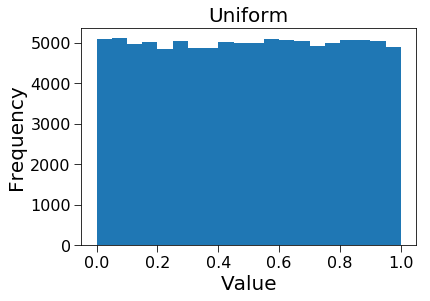

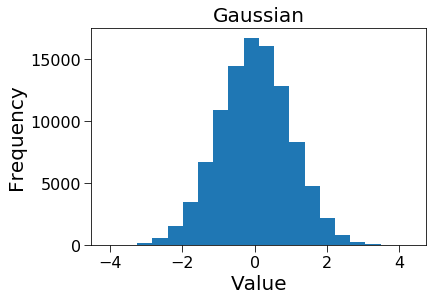

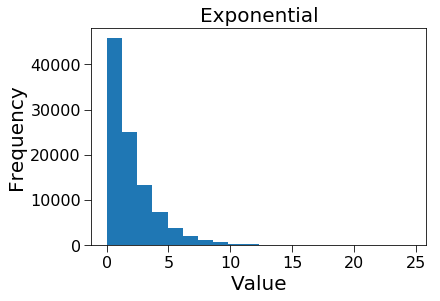

In [12]:
plotDistributions()

In [13]:
def getDiffs(population, sampleSizes):
    popStd = numpy.std(population)
    diffsFracs = []
    for sampleSize in sampleSizes:
        diffs = []
        for t in range(100):
            sample = random.sample(population, sampleSize)
            diffs.append(abs(popStd - numpy.std(sample)))
        diffMean = sum(diffs)/len(diffs)
        diffsFracs.append(diffMean/popStd)
    return pylab.array(diffsFracs)*100

In [14]:
def plotDiffs(sampleSizes, diffs, title, label, color = 'b'):
    pylab.plot(sampleSizes, diffs, label = label,
               color = color)
    pylab.xlabel('Sample Size')
    pylab.ylabel('% Difference in SD')
    pylab.title(title)
    pylab.legend()

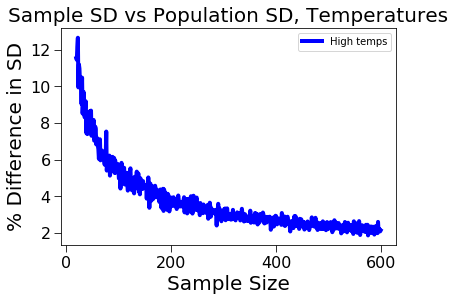

In [15]:
sampleSizes = range(20, 600, 1)
diffs = getDiffs(getHighs(), sampleSizes)
plotDiffs(sampleSizes, diffs,
          'Sample SD vs Population SD, Temperatures',
          label = 'High temps')

In [16]:
def compareDists():
    uniform, normal, exp = [], [], []
    for i in range(100000):
        uniform.append(random.random())
        normal.append(random.gauss(0, 1))
        exp.append(random.expovariate(0.5))
    sampleSizes = range(20, 600, 1)
    udiffs = getDiffs(uniform, sampleSizes)
    ndiffs = getDiffs(normal, sampleSizes)
    ediffs = getDiffs(exp, sampleSizes)
    plotDiffs(sampleSizes, udiffs,
              'Sample SD vs Population SD',
              'Uniform population', 'm')
    plotDiffs(sampleSizes, ndiffs,
              'Sample SD vs Population SD',
              'Normal population', 'b')
    plotDiffs(sampleSizes, ediffs,
              'Sample SD vs Population SD',
              'Exponential population', 'r')

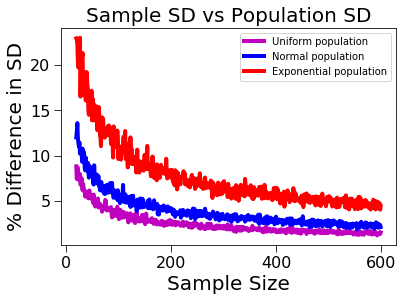

In [17]:
compareDists()  

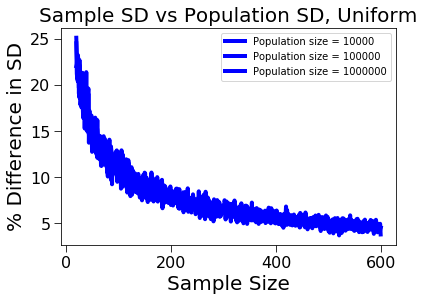

In [18]:
popSizes = (10000, 100000, 1000000)
sampleSizes = range(20, 600, 1)
for size in popSizes:
    population = []
    for i in range(size):
        population.append(random.expovariate(0.5))
    ediffs = getDiffs(population, sampleSizes)
    plotDiffs(sampleSizes, ediffs,
              'Sample SD vs Population SD, Uniform',
              'Population size = ' + str(size))

In [19]:
temps = getHighs()
popMean = sum(temps)/len(temps)
sampleSize = 200
numTrials = 10000

random.seed(0)
numBad = 0
for t in range(numTrials):
    posStartingPts = range(0, len(temps) - sampleSize)
    start = random.choice(posStartingPts)
    sample = temps[start:start+sampleSize]
    sampleMean = sum(sample)/sampleSize
    se = numpy.std(sample)/sampleSize**0.5
    if abs(popMean - sampleMean) > 1.96*se:
        numBad += 1
print('Fraction outside 95% confidence interval =',
      numBad/numTrials)

Fraction outside 95% confidence interval = 0.8906


In [20]:
random.seed(0)      
numBad = 0
for t in range(numTrials):
    sample = random.sample(temps, sampleSize)
    sampleMean = sum(sample)/sampleSize
    se = numpy.std(sample)/sampleSize**0.5
    if abs(popMean - sampleMean) > 1.96*se:
        numBad += 1
print('Fraction outside 95% confidence interval =',
      numBad/numTrials)

Fraction outside 95% confidence interval = 0.0511
